# Pattern Problem

In [50]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_circles, make_classification
%matplotlib inline
%config InlineBackend.figure_format='retina'

## Make Sample Data
- Linear
- Non-Linear

### Linear Model - X_1

In [52]:
X_1, y_1 = make_classification(n_samples=300, # 표본 데이터의 수
                               n_features=2, # 독립 변수의 수
                               n_redundant=0, # 독립변수 중 다른 독립변수의 선형 조합으로 나타나는 성분의 수
                               n_informative=2, # 독립변수 중 종속변수와 상관관계가 있는 성분의 수
                               random_state=1, # 난수 발생 시드
                               n_clusters_per_class=1, # 클래스 당 클러스터의 수
                               n_classes=2, # 종속변수의 클래스 수
                               class_sep=3,
                              )
X_1[:,1] = (X_1[:,0]+X_1[:,1])/2 # 우상향 그래프; 첫번째 열과 두번째 열을 연관지음
rng = np.random.RandomState(2) # 오차를 발생
X_1 += 2*rng.uniform(size=X_1.shape)

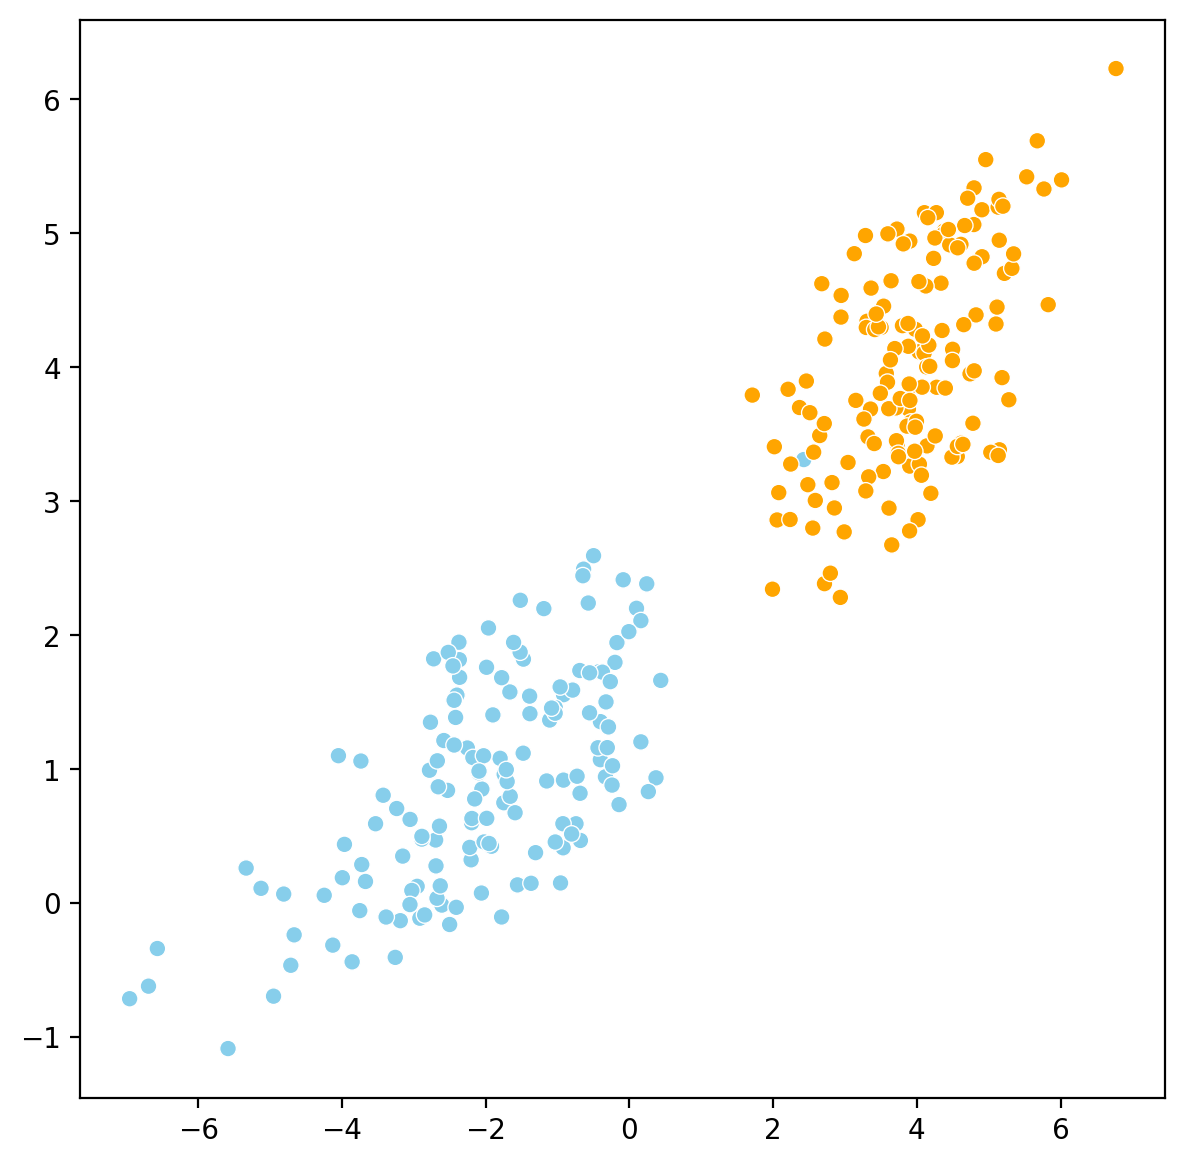

In [53]:
color_code = {0:'Orange', 1:'Skyblue'}
plt.figure(figsize=(7,7))
sns.scatterplot(x=X_1[:,0], y=X_1[:,1], c=[color_code.get(i) for i in y_1])
plt.show()

### Non-Linear Model - X_2

In [54]:
np.random.seed(1)
def CircleXY(r, n, sigma): # r-반지름, n-Sample수, sigma-Error정도
    theta = np.random.uniform(low=0, high=2*np.pi, size=n) # 0~theta~2*pi
    x_error = np.random.normal(loc=.0, scale=sigma, size=n)
    y_error = np.random.normal(loc=.0, scale=sigma, size=n)
    
    x_val = r*np.cos(theta)+x_error
    y_val = r*np.sin(theta)+y_error
    return x_val, y_val, np.repeat(r,n)

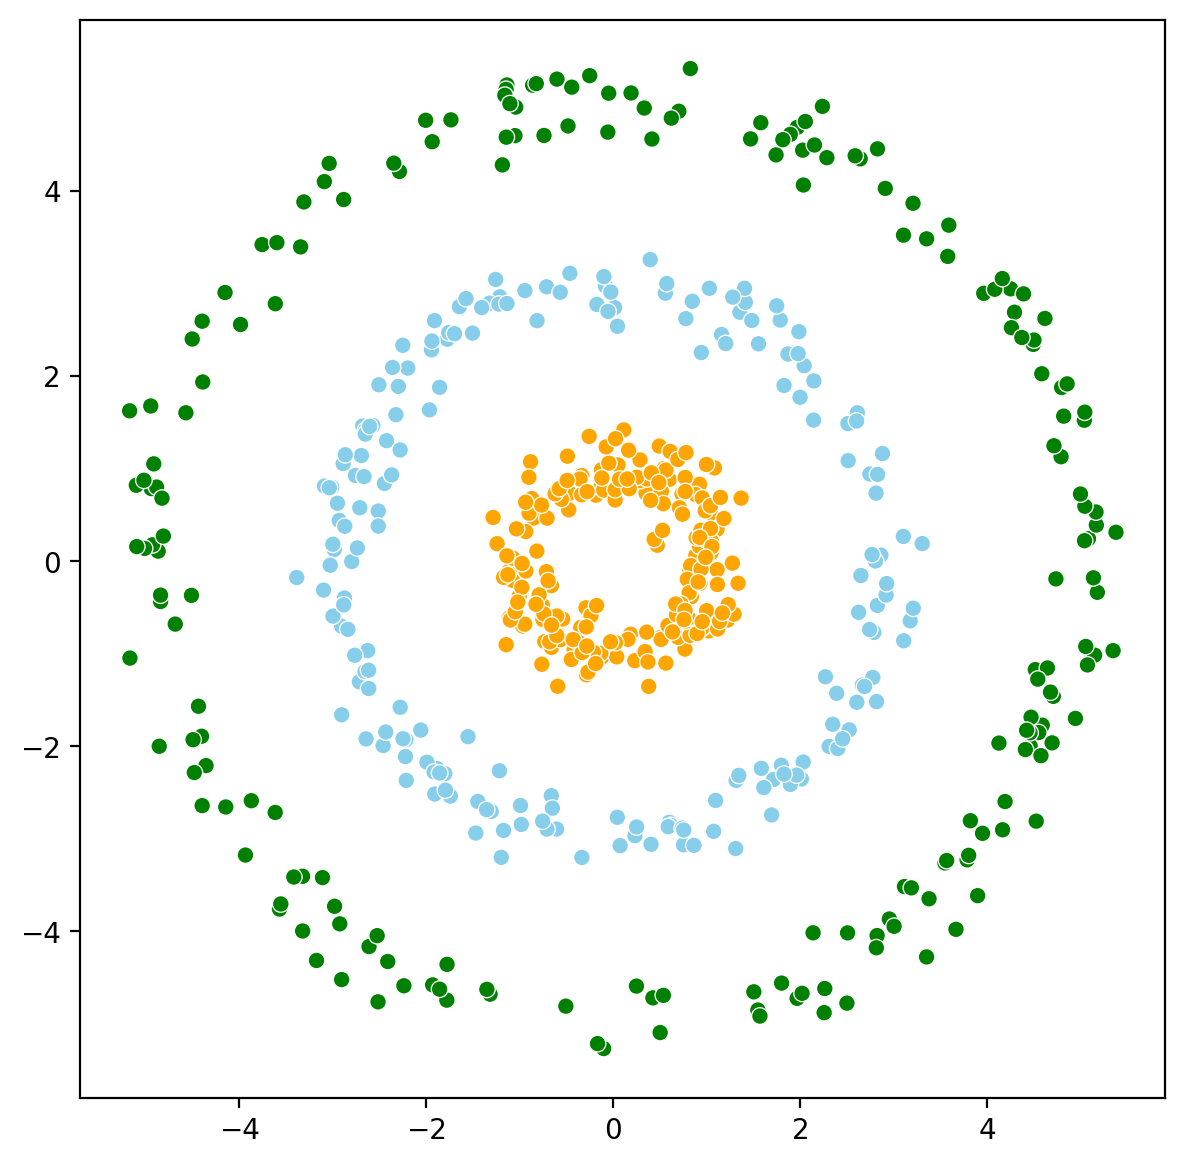

In [55]:
plt.figure(figsize=(7,7))
n = 200 # Number of Samples
r_list = [1,3,5] # Radius
sigma = 0.2 # Error
parm_lists = [(r, n, sigma) for r in r_list]
coordinates = [CircleXY(param[0], param[1], param[2]) for param in parm_lists]
color_code = {1:'Orange', 3:'Skyblue', 5:'Green'}

"""
for j in range(0, len(coordinates)):
    sns.scatterplot(x=coordinates[j][0], y=coordinates[j][1], c=[color_code.get(i) for i in coordinates[j][2]])
"""
for j in range(0, len(coordinates)):
    x,y,group = coordinates[j]
    sns.scatterplot(x=x, y=y, c=[color_code.get(i) for i in group])

plt.show()

In [56]:
X1, X2, y_2_bf = [np.append(np.append(coordinates[0][i], coordinates[1][i]), coordinates[2][i]) for i in range(3)]
X_2 = np.c_[X1, X2] # Coordinate
mapping_dic = {1:0, 3:1, 5:2}
y_2_bf2 = [mapping_dic.get(i) for i in y_2_bf]
y_2 = np.array(y_2_bf2)

## K Means Cluster

In [57]:
from sklearn.cluster import KMeans

In [58]:
km=KMeans(n_clusters=3, n_init=10, random_state=1)
km.fit(X_1)

KMeans(n_clusters=3, n_init=10, random_state=1)

In [59]:
centers = km.cluster_centers_
y_km = km.labels_

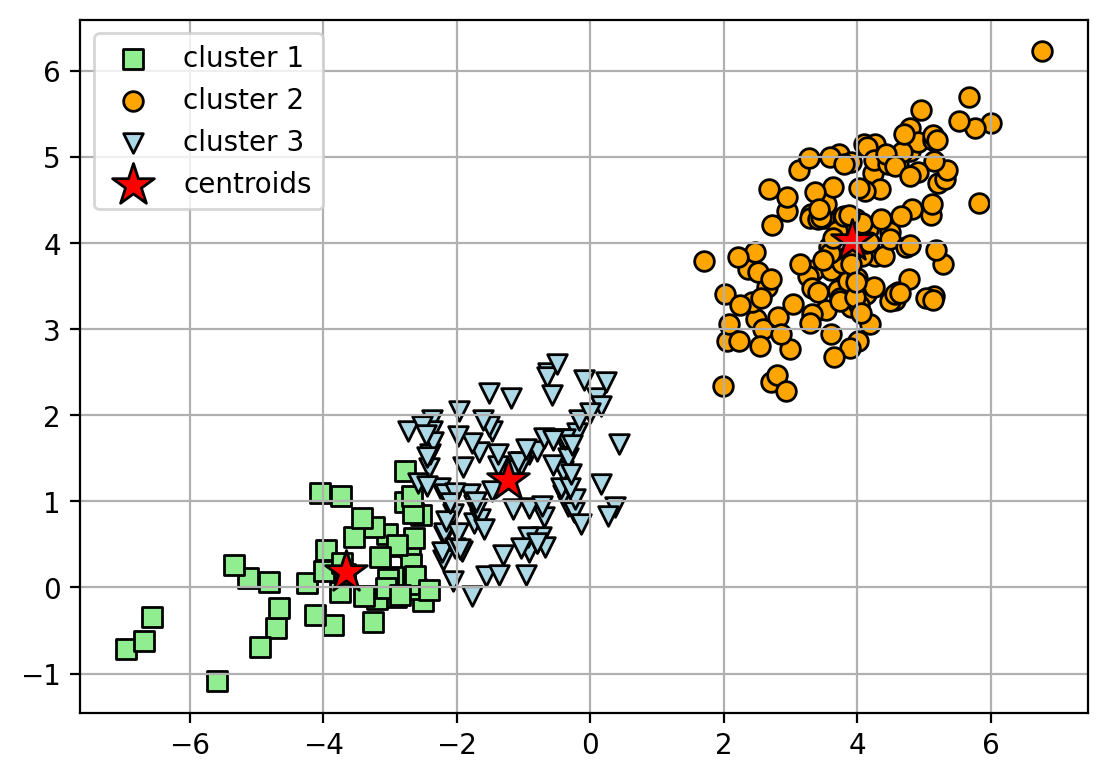

In [60]:
color_code = {0:'lightgreen', 1:'orange', 2:'lightblue'}
marker_code = {0:'s', 1:'o', 2:'v'}

fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))
for i in np.unique(y_km):
    ax.scatter(
        X_1[y_km == i, 0], X_1[y_km == i, 1],
        s=50, c=[color_code.get(i)],
        marker=marker_code.get(i),
        edgecolors='black',
        label=f'cluster {i+1}'
    ) 
    
ax.scatter(
    centers[:,0], centers[:,1],
    s=250, marker='*',
    c='red', edgecolors='k',
    label='centroids'
)
ax.legend(scatterpoints=1)
plt.grid()
plt.show()

In [61]:
"""
plt.scatter(
    X_1[y_km == 0, 0], X_1[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolors='k',
    label='cluster 1'
)

plt.scatter(
    X_1[y_km == 1,0], X_1[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolors='k',
    label='cluster 2'
)

plt.scatter(
    X_1[y_km == 2,0], X_1[y_km == 2,1],
    s=50, c='lightblue',
    marker='v', edgecolors='k',
    label='cluster 3'
)

plt.scatter(
    centers[:,0], centers[:,1],
    s=250, marker='*',
    c='red', edgecolors='k',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()
"""

"\nplt.scatter(\n    X_1[y_km == 0, 0], X_1[y_km == 0, 1],\n    s=50, c='lightgreen',\n    marker='s', edgecolors='k',\n    label='cluster 1'\n)\n\nplt.scatter(\n    X_1[y_km == 1,0], X_1[y_km == 1, 1],\n    s=50, c='orange',\n    marker='o', edgecolors='k',\n    label='cluster 2'\n)\n\nplt.scatter(\n    X_1[y_km == 2,0], X_1[y_km == 2,1],\n    s=50, c='lightblue',\n    marker='v', edgecolors='k',\n    label='cluster 3'\n)\n\nplt.scatter(\n    centers[:,0], centers[:,1],\n    s=250, marker='*',\n    c='red', edgecolors='k',\n    label='centroids'\n)\nplt.legend(scatterpoints=1)\nplt.grid()\nplt.show()\n"

### Elbow Method to find Hyperparameter K

In [62]:
distortions = []
for i in range(1, 11):
    km=KMeans(n_clusters=i, random_state=1, n_init=10)
    km.fit(X_1)
    distortions.append(km.inertia_)

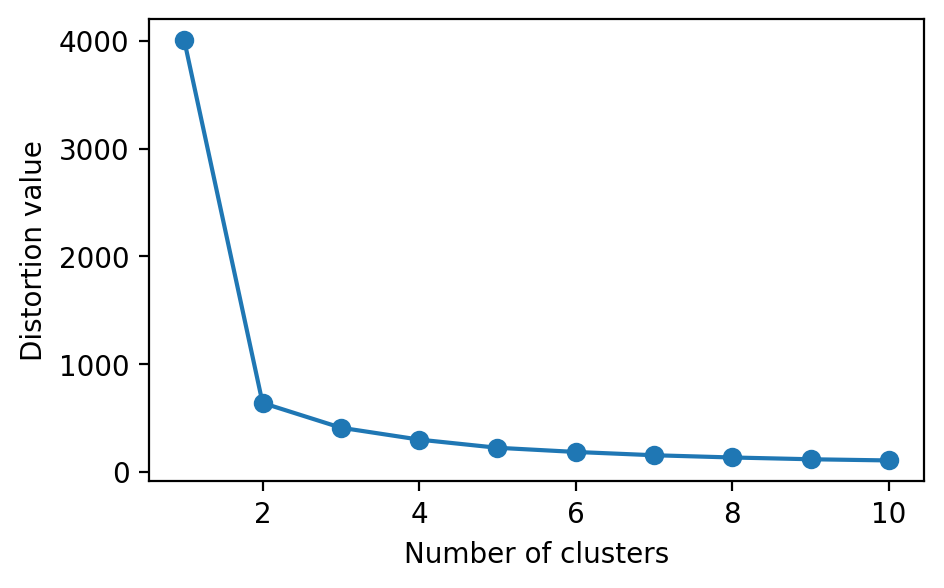

In [63]:
plt.figure(figsize=(5,3))
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion value')
plt.show()

### Apply K

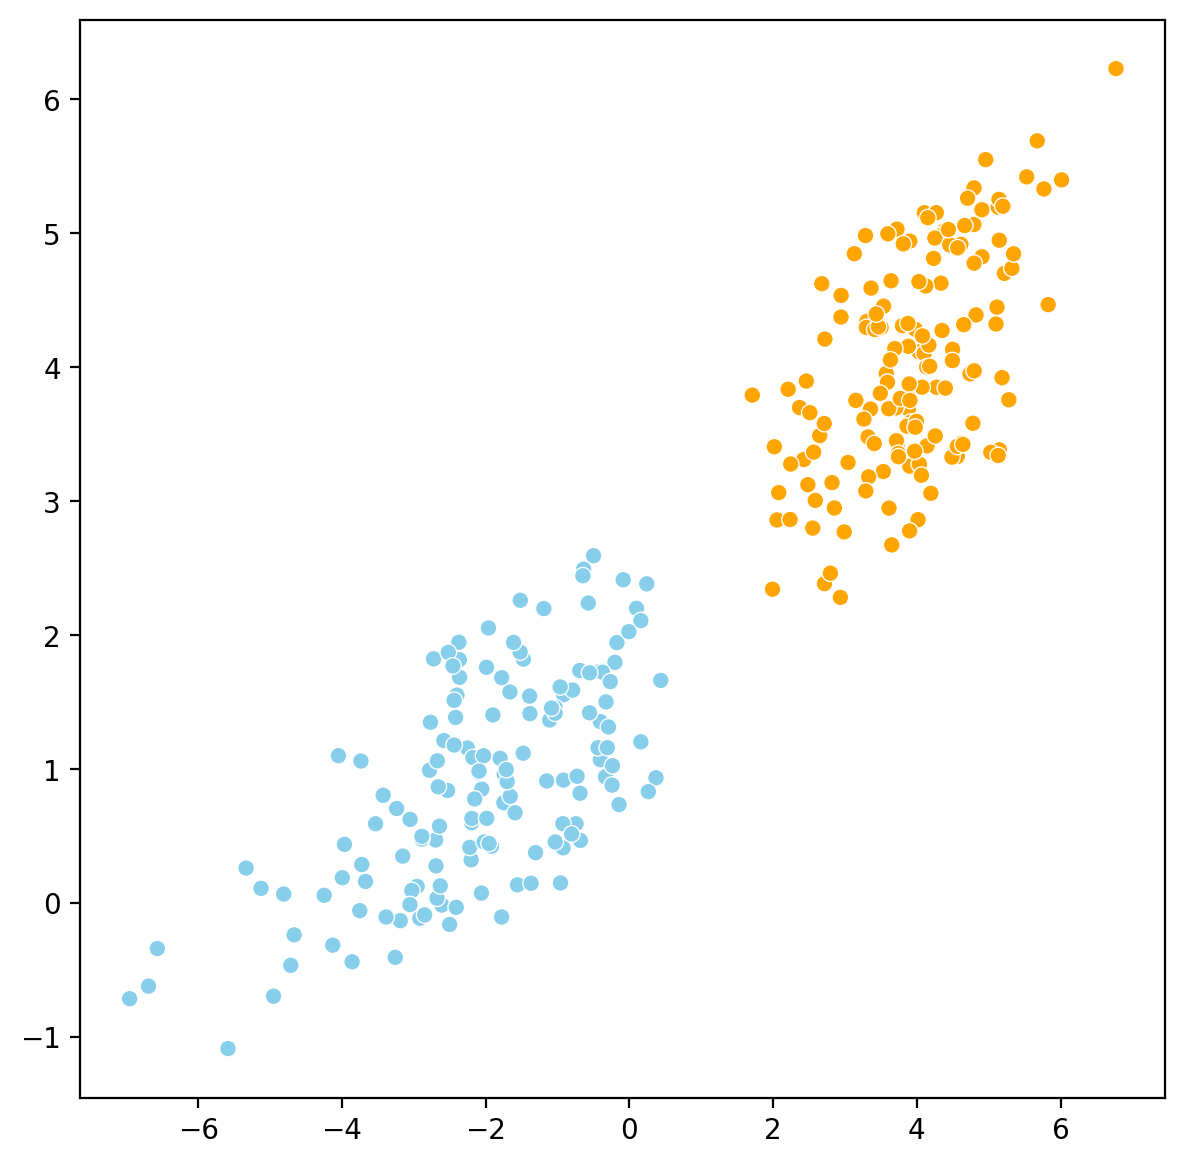

In [64]:
color_code={0:'Orange', 1:'Skyblue'}
plt.figure(figsize=(7,7))

km=KMeans(n_clusters=2, n_init=10, random_state=1)
km.fit(X_1)
y_km=km.labels_

sns.scatterplot(x=X_1[:,0], y=X_1[:,1], c=[color_code.get(i) for i in y_km])
plt.show()

## Singular Value Decomposition (for PCA)

### Covariance

$\begin{align}
\text{Cov}(X, Y) &= E[(X-E[X])(Y-E[Y])] \\
& = E[XY-XE[Y]-YE[X]+E[X]E[Y]] \\
& = E[XY]-E[X]E[Y]-E[Y]E[X]+E[X]E[Y]
\end{align}$

$
\therefore \text{Cov}(X, Y) = E[XY] - E[X]E[Y]
$

In [65]:
# X_1 데이터의 각 변수를 평균이 0이 되도록 만들어줌
# mX의 Quadratic 형태가 Covariance와 상수배가 됨
mX = X_1.copy()
for i in range(X_1.shape[1]):
    mX[:,i] = mX[:,i] - np.mean(X_1[:,i])

In [66]:
A = np.cov(mX.T)
A

array([[10.32543426,  5.22917238],
       [ 5.22917238,  3.06569127]])

### SVD
$
n \times p \; \text{Matrix } X \\
\cdot X = UDV^T \\
\cdot U: n \times p, \; D: p \times p, \; V: p \times p \\
\cdot V^TV = I_p, \; U^TU = I_p, \; D: \text{diagonal matrix}\\
\cdot \text{Column vectors of } \textbf{V: } \text{eigen vectors of }X^TX \\
\cdot \text{Diagonal entries of } \textbf{D: } \text{eigen values of }X^TX
$

In [67]:
aU, aD, aV = np.linalg.svd(A)

In [68]:
XV = np.dot(mX, aV) # Principal Component; PC Score

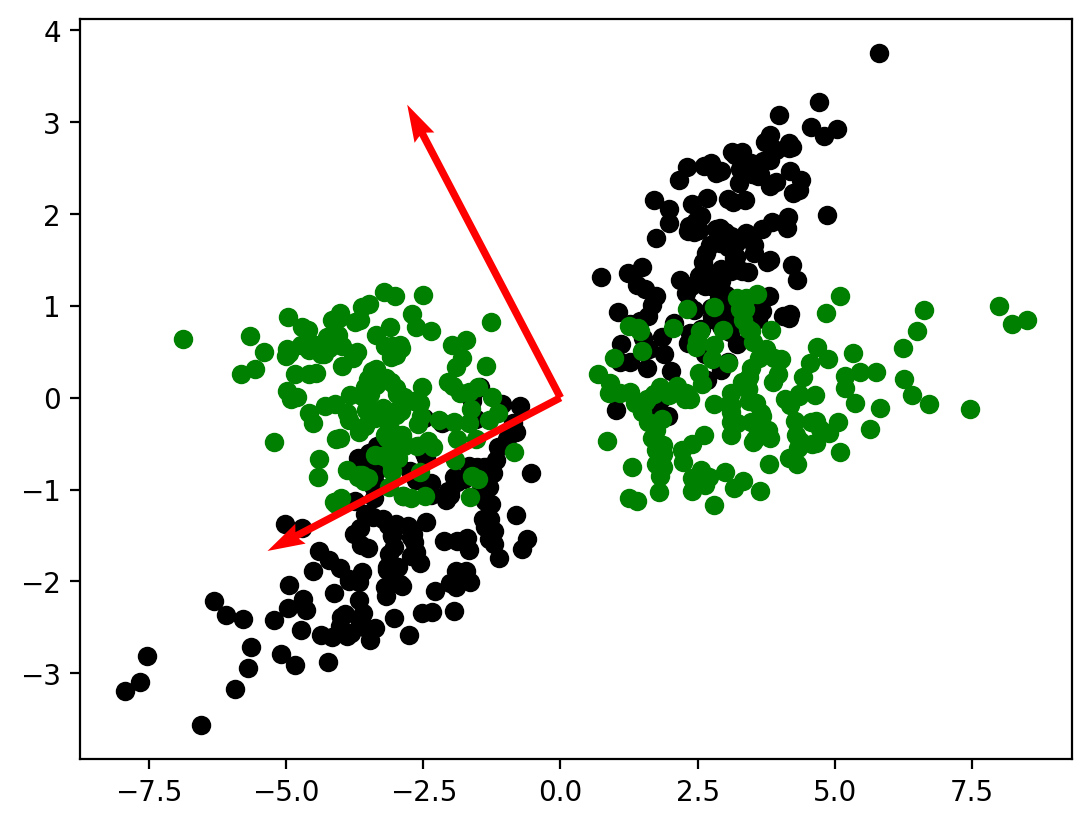

In [69]:
plt.scatter(mX[:,0], mX[:,1], color='black') # Original Data
plt.scatter(XV[:,0], XV[:,1], color='green') # PC Score; 축을 회전시켜서 x축과 y축 사이의 선형관계를 없앰
origin = (0, 0)
# eigen vector(타원의 장축과 단축에 해당); plt.quiver
# eigen value(그 축의 길이); plt.quiver
plt.quiver(origin[0], origin[1],aV[0,0], aV[1,0], color=['r', 'b'], scale=3)
plt.quiver(origin[0], origin[1],aV[0,1], aV[1,1], color=['r', 'b'], scale=3)
plt.show()

In [70]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(X_1)

PCA()

In [71]:
# PC Score
PCscore = pca.transform(X_1)
print(PCscore[0:5, :])
print(XV[0:5, :])

[[ 2.63595872e+00  9.51221703e-01]
 [-4.79153199e+00 -3.89366241e-03]
 [ 3.67737753e+00  1.95026949e-01]
 [ 3.50983062e+00 -6.04572440e-01]
 [ 3.65909682e+00  1.68818201e-01]]
[[ 2.63595872e+00 -9.51221703e-01]
 [-4.79153199e+00  3.89366241e-03]
 [ 3.67737753e+00 -1.95026949e-01]
 [ 3.50983062e+00  6.04572440e-01]
 [ 3.65909682e+00 -1.68818201e-01]]


In [72]:
# eigen vector
eigens_v = pca.components_.T
print(aV)
print(eigens_v)

[[-0.88606913 -0.46355312]
 [-0.46355312  0.88606913]]
[[-0.88606913  0.46355312]
 [-0.46355312 -0.88606913]]


In [73]:
# eigen value
# pca는 자동으로 값이 큰 것이 앞에 위치
print(pca.explained_variance_)
print(aD)

[13.06111151  0.33001402]
[13.06111151  0.33001402]


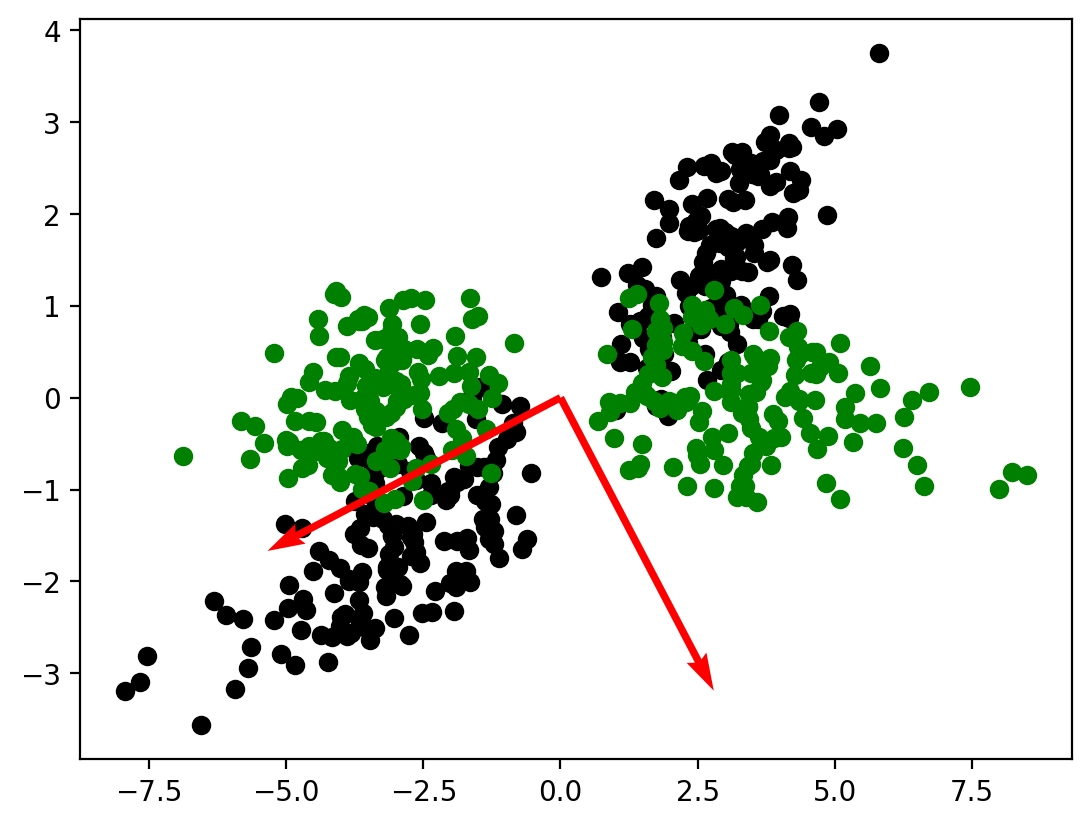

In [74]:
mX = X_1.copy()
for i in range(X_1.shape[1]):
    mX[:, i] = mX[:, i] - np.mean(X_1[:, i])

plt.scatter(mX[:, 0], mX[:, 1], color='black')
plt.scatter(PCscore[:, 0], PCscore[:, 1], color='green')
origin= (0,0)
plt.quiver(*origin, eigens_v[0,0], eigens_v[1,0], color=['red','b'], scale=3)
plt.quiver(*origin, eigens_v[0,1], eigens_v[1,1], color=['red','b'], scale=3)
plt.show()

$\begin{align}
\rightarrow &\textbf{XV} = \text{PC score} \\
            &\textbf{V} = \text{eigen vector; pca.components_.T} \\
            &\textbf{D} = \text{eigen value; pca.explained_variance_}
\end{align}$

## PC를 활용한 차원 축소

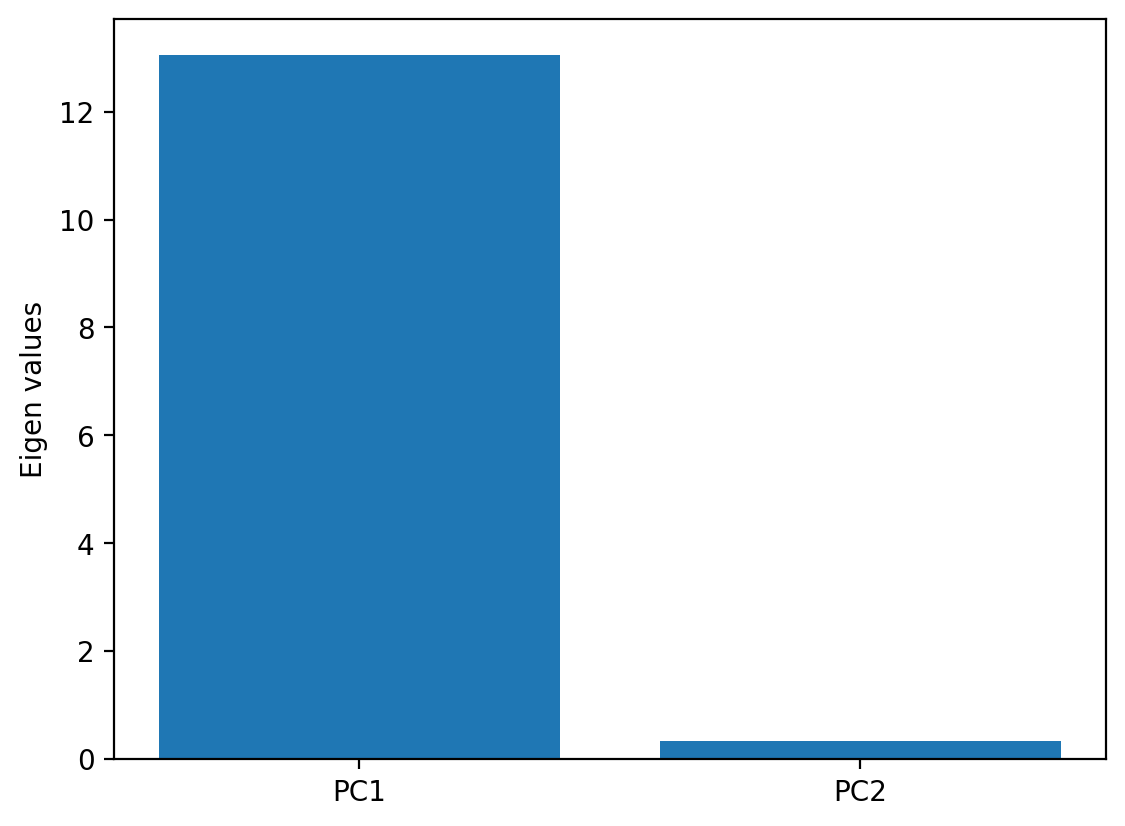

In [75]:
label = ['PC1', 'PC2']
index = np.arange(len(label))
plt.bar(index, pca.explained_variance_)
plt.ylabel('Eigen values')
plt.xticks(index, label)
plt.show()

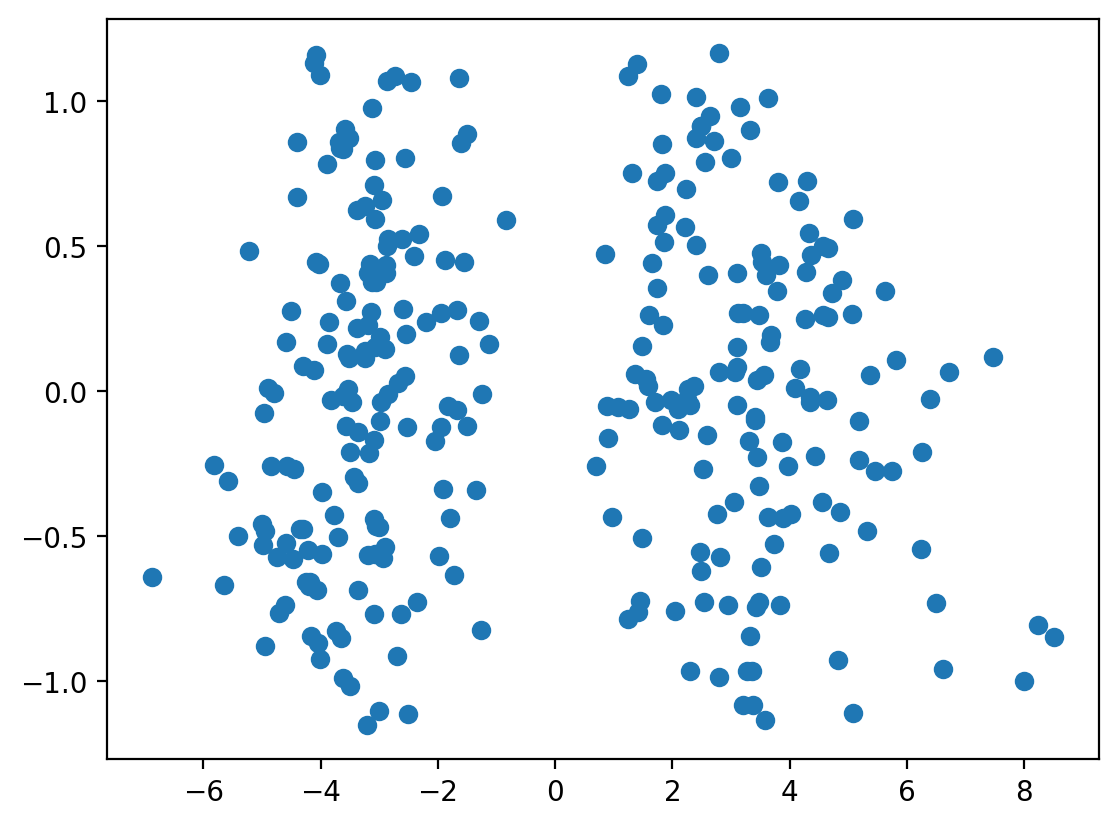

In [76]:
plt.scatter(PCscore[:,0],PCscore[:,1])
plt.show()

In [77]:
X_1.shape

(300, 2)

In [78]:
PCscore.shape

(300, 2)

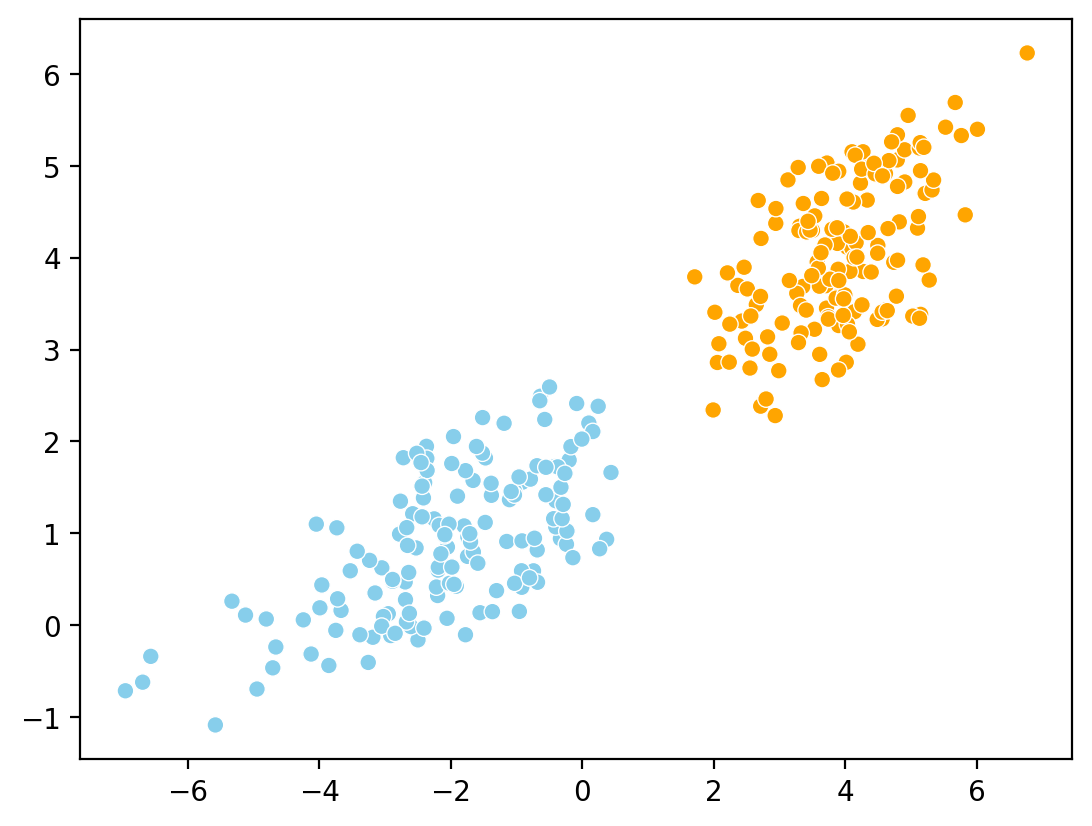

In [79]:
PC1_matrix = PCscore.copy()
km=KMeans(n_clusters=2, n_init=10, random_state=1)
km.fit(PC1_matrix)
y_km=km.labels_
color_code={0:'Orange', 1:'Skyblue'}

sns.scatterplot(x=X_1[:,0], y=X_1[:,1], c=[color_code.get(i) for i in y_km])
plt.show()

### Apply Non-Linear Data

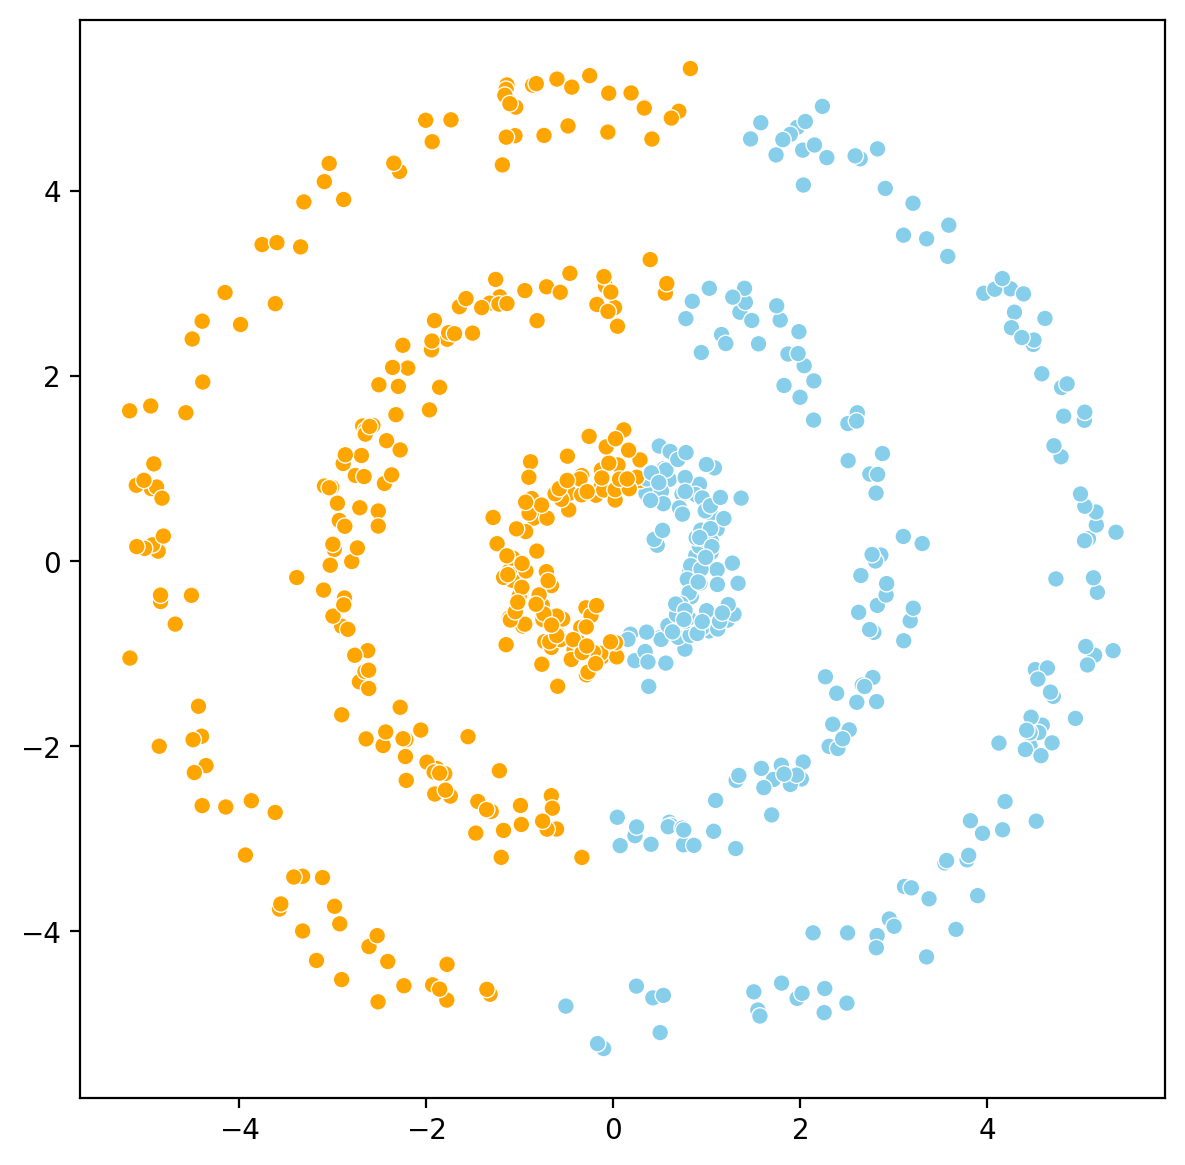

In [80]:
color_code = {0:'Orange', 1:'Skyblue'}
plt.figure(figsize=(7, 7))

km = KMeans(n_clusters=2, n_init=10, random_state=1)
km.fit(X_2)
y_km = km.labels_
sns.scatterplot(x=X_2[:,0], y=X_2[:,1], color=[color_code.get(i) for i in y_km])
plt.show()

### Apply PCA in Non-Linear Data

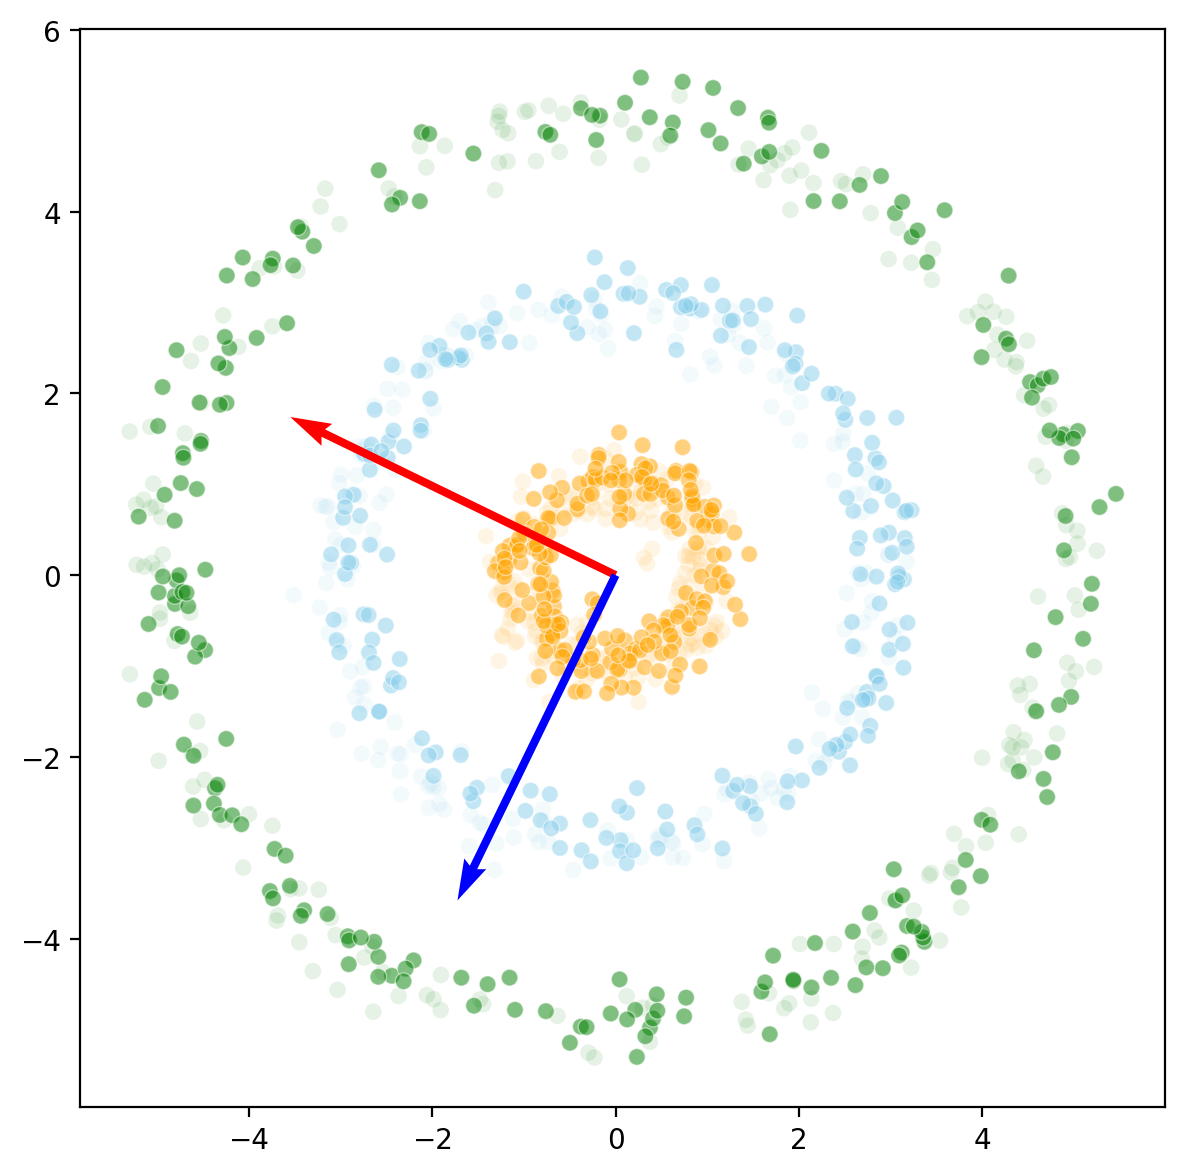

In [81]:
pca = PCA()
pca.fit(X_2)
eigens_v = pca.components_.T
PCscore = pca.transform(X_2)
color_code = {0:'Orange', 1:'Skyblue', 2:'Green'}

# Centering
mX = X_2.copy()
for i in range(X_2.shape[1]):
    mX[:,i] = mX[:,i] - np.mean(X_2[:,i])
    
plt.figure(figsize=(7, 7))
sns.scatterplot(x=mX[:,0], y=mX[:,1], c=[color_code.get(i) for i in y_2], alpha=0.1)
sns.scatterplot(x=PCscore[:,0], y=PCscore[:,1], c=[color_code.get(i) for i in y_2], alpha=0.5)
origion=(0, 0)
plt.quiver(*origin, eigens_v[0,0], eigens_v[1,0], color='r', scale=3)
plt.quiver(*origin, eigens_v[0,1], eigens_v[1,1], color='b', scale=3)

plt.show()

$
\rightarrow \text{원점을 기준으로 회전변환}
$

In [82]:
pca.explained_variance_

array([5.93851327, 5.68964896])

$
\rightarrow \text{PC1과 PC2가 유사하다는 것은 데이터들 간에 선형적인 패턴이 없다는 것을 의미} \\
\rightarrow \text{Clustering은 패턴을 찾아 군집화} \\
\rightarrow \text{PCA는 패턴을 찾아 축을 찾아 그 축을 활용 혹은 차원축소를 하게 만들어줌} \\
\rightarrow \text{결과적으로 위 과정은 비선형에서는 불가}
$

In [83]:
from sklearn.datasets import make_moons

In [84]:
X_3, y_3 = make_moons(n_samples=300, random_state=1)

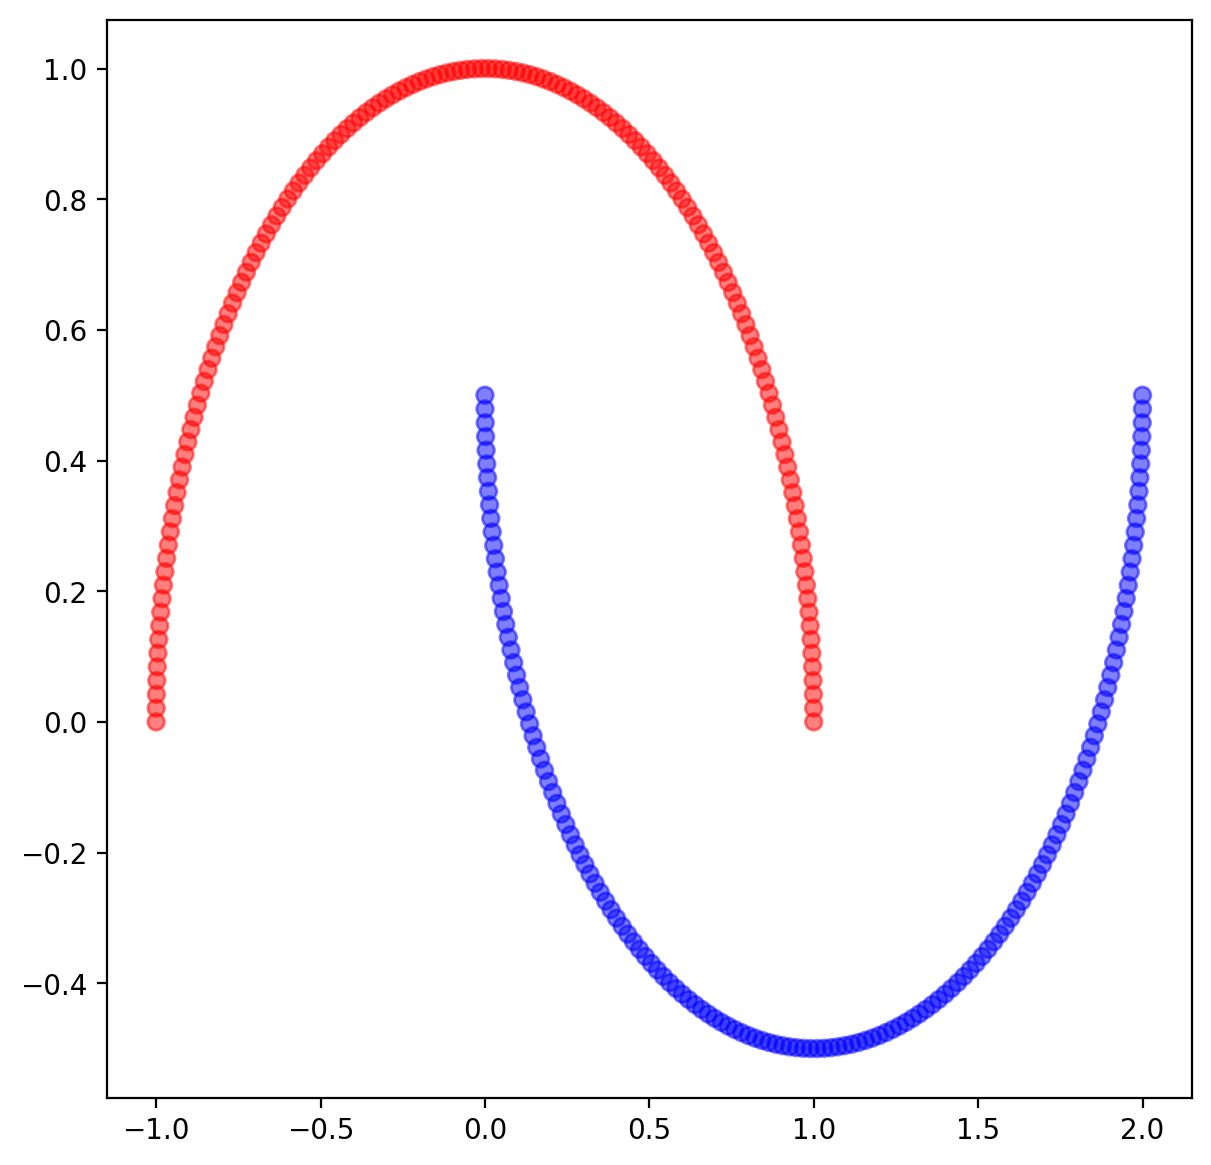

In [85]:
plt.figure(figsize=(7,7))
color_code = {0:'red', 1:'blue'}

plt.scatter(X_3[:,0], X_3[:,1], c=[color_code.get(i) for i in y_3], alpha=0.5)
plt.show()

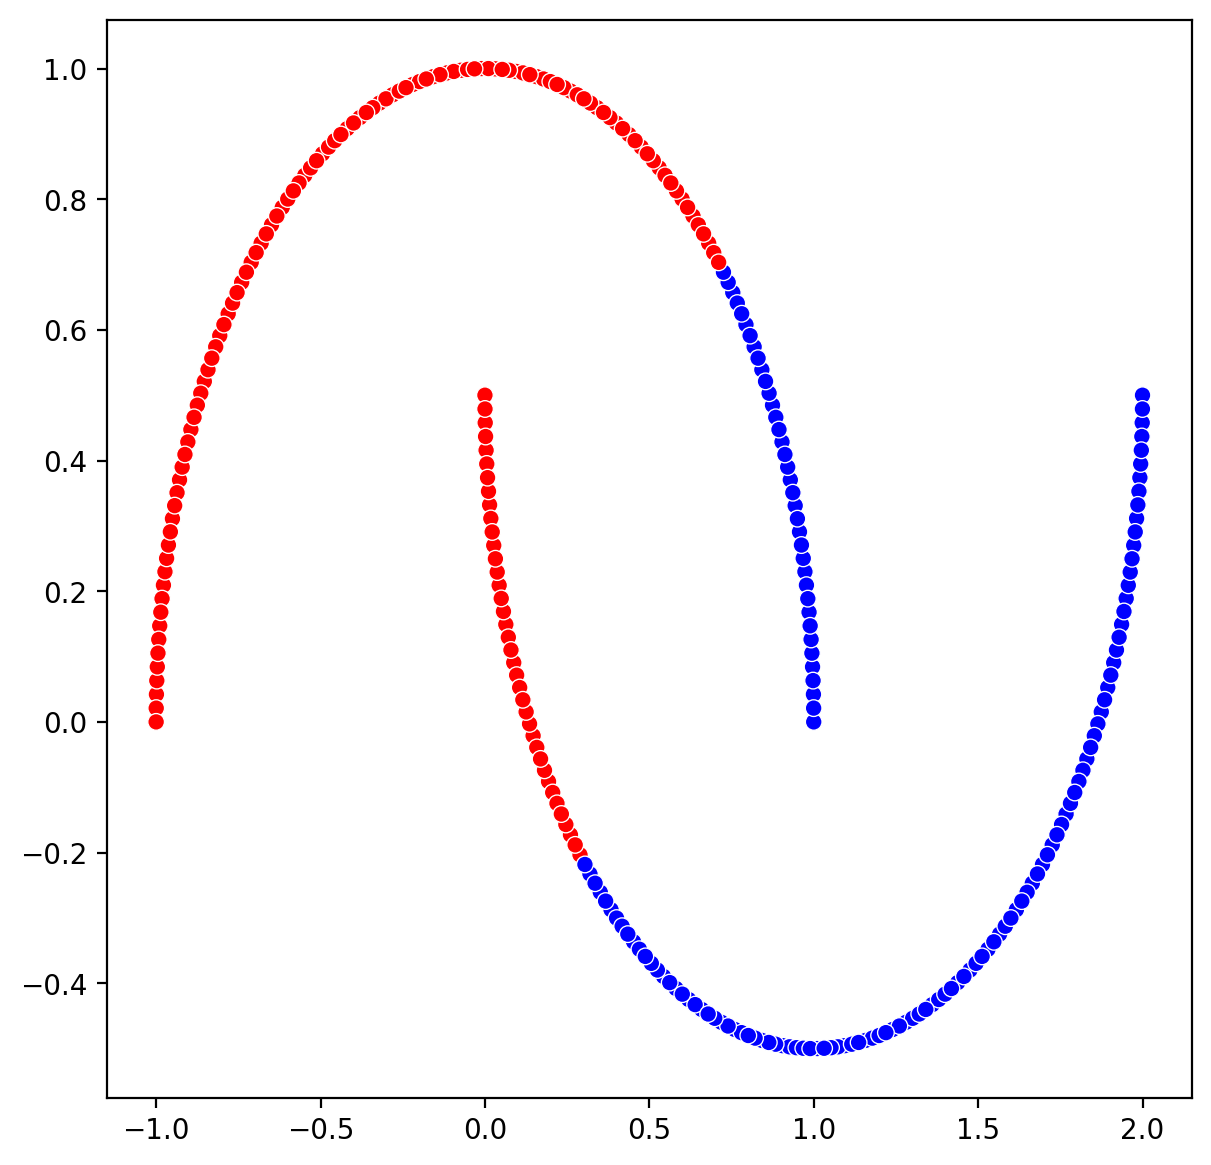

In [86]:
plt.figure(figsize=(7,7))
color_code = {0:'red', 1:'blue'}

km = KMeans(n_clusters=2, n_init=10, random_state=1)
km.fit(X_3)
y_km = km.labels_
sns.scatterplot(x=X_3[:,0], y=X_3[:,1], c=[color_code.get(i) for i in y_km])
plt.show()

In [87]:
eigens_v

array([[-0.89937471, -0.43717861],
       [ 0.43717861, -0.89937471]])

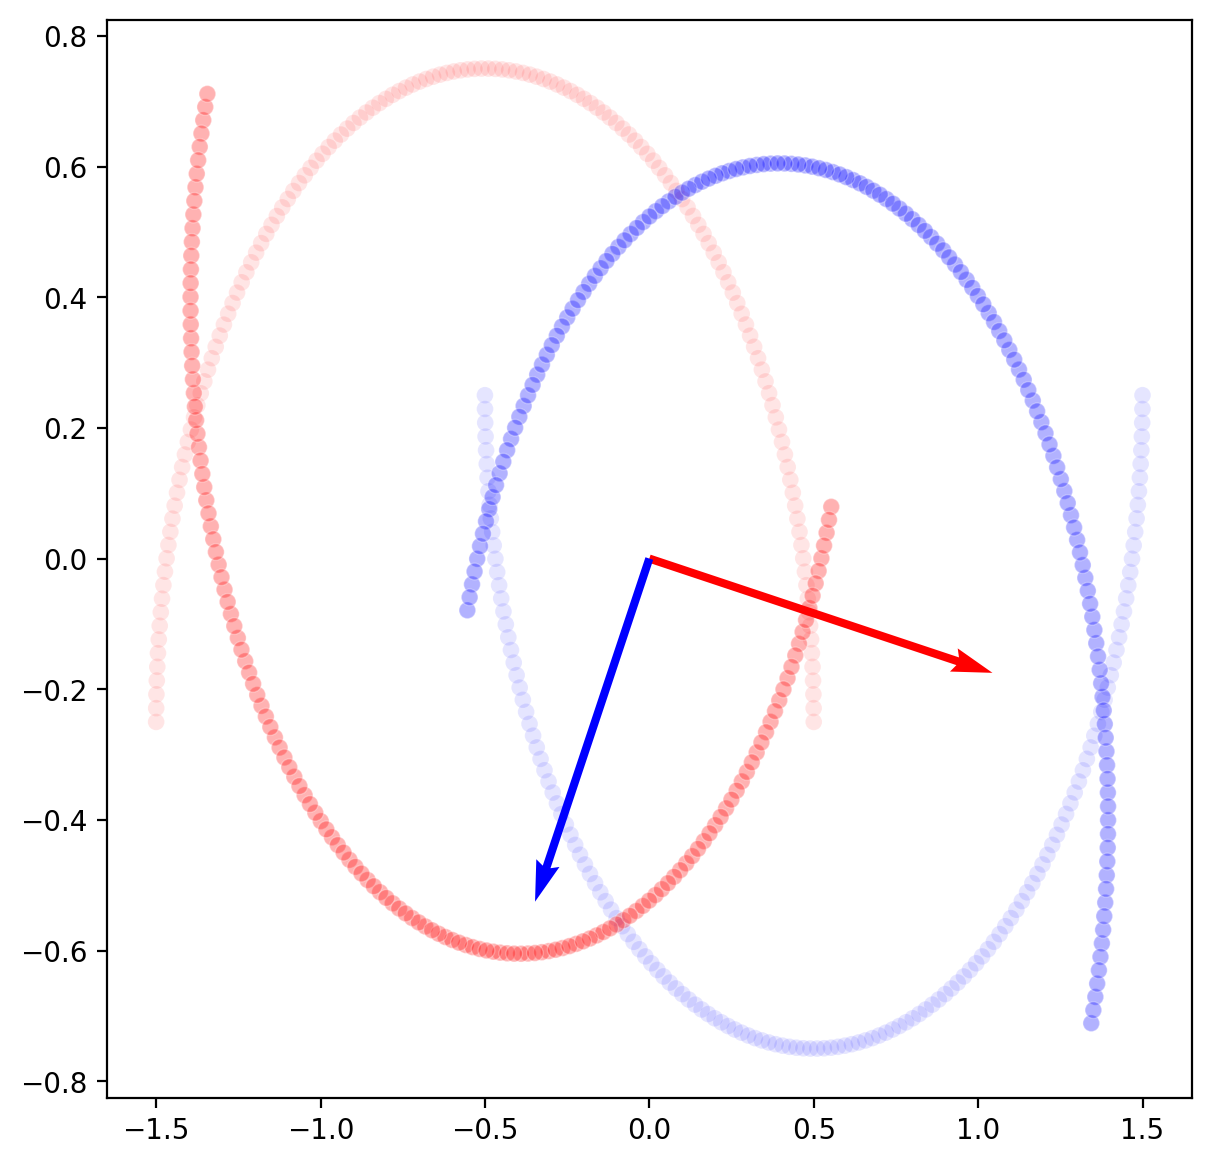

In [88]:
pca=PCA()
pca.fit(X_3)
PCscore = pca.transform(X_3)
eigens_v=pca.components_.transpose()
color_code={0:'red', 1:'blue'}

mX=X_3
for i in range(X_3.shape[1]):
    mX[:,i] = mX[:,i] - np.mean(mX[:,i])
    
plt.figure(figsize=(7,7))

sns.scatterplot(x=mX[:,0], y=mX[:,1], c=[color_code.get(i) for i in y_3], alpha=0.1)
sns.scatterplot(x=PCscore[:,0], y=PCscore[:,1], c=[color_code.get(i) for i in y_3], alpha=0.3)

origin = (0,0)
plt.quiver(*origin, eigens_v[0,0], eigens_v[1,0], color='r', scale=3)
plt.quiver(*origin, eigens_v[0,1], eigens_v[1,1], color='b', scale=3)
plt.show()

In [89]:
from synthetic_dataset.soydata.data import *

In [90]:
X_4, y_4 = classification.make_spiral(n_samples_per_class=500,
                                      n_classes=2, n_rotations=2,
                                      gap_between_spiral=30,
                                      noise=0.05
                                     )

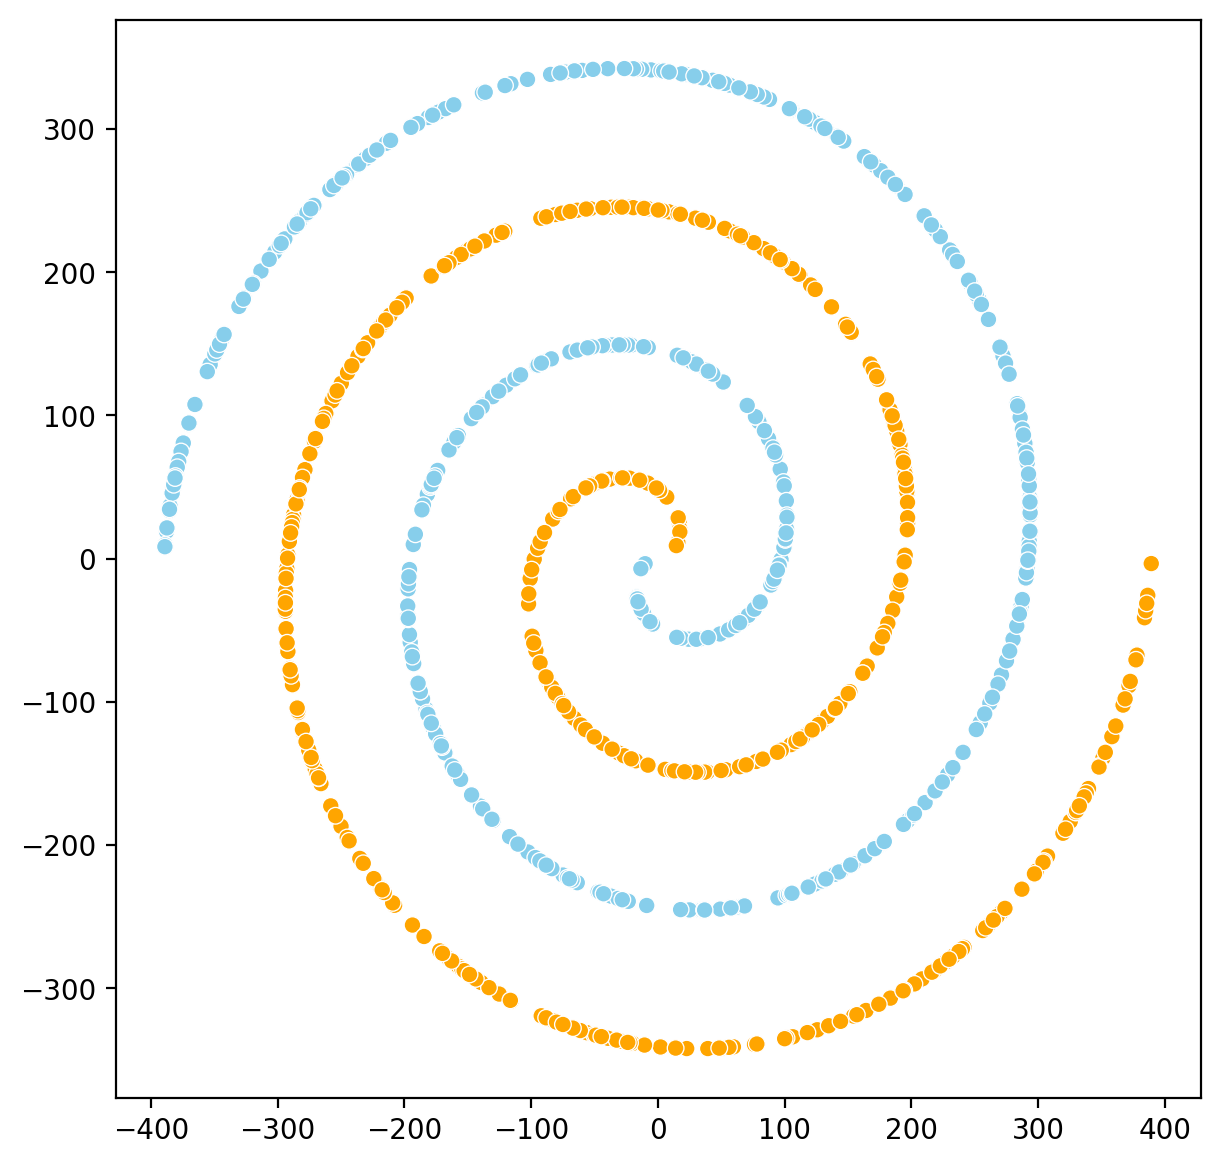

In [91]:
plt.figure(figsize=(7,7))
color_code={0:'orange', 1:'skyblue'}

sns.scatterplot(x=X_4[:,0], y=X_4[:,1], c=[color_code.get(i) for i in y_4])
plt.show()

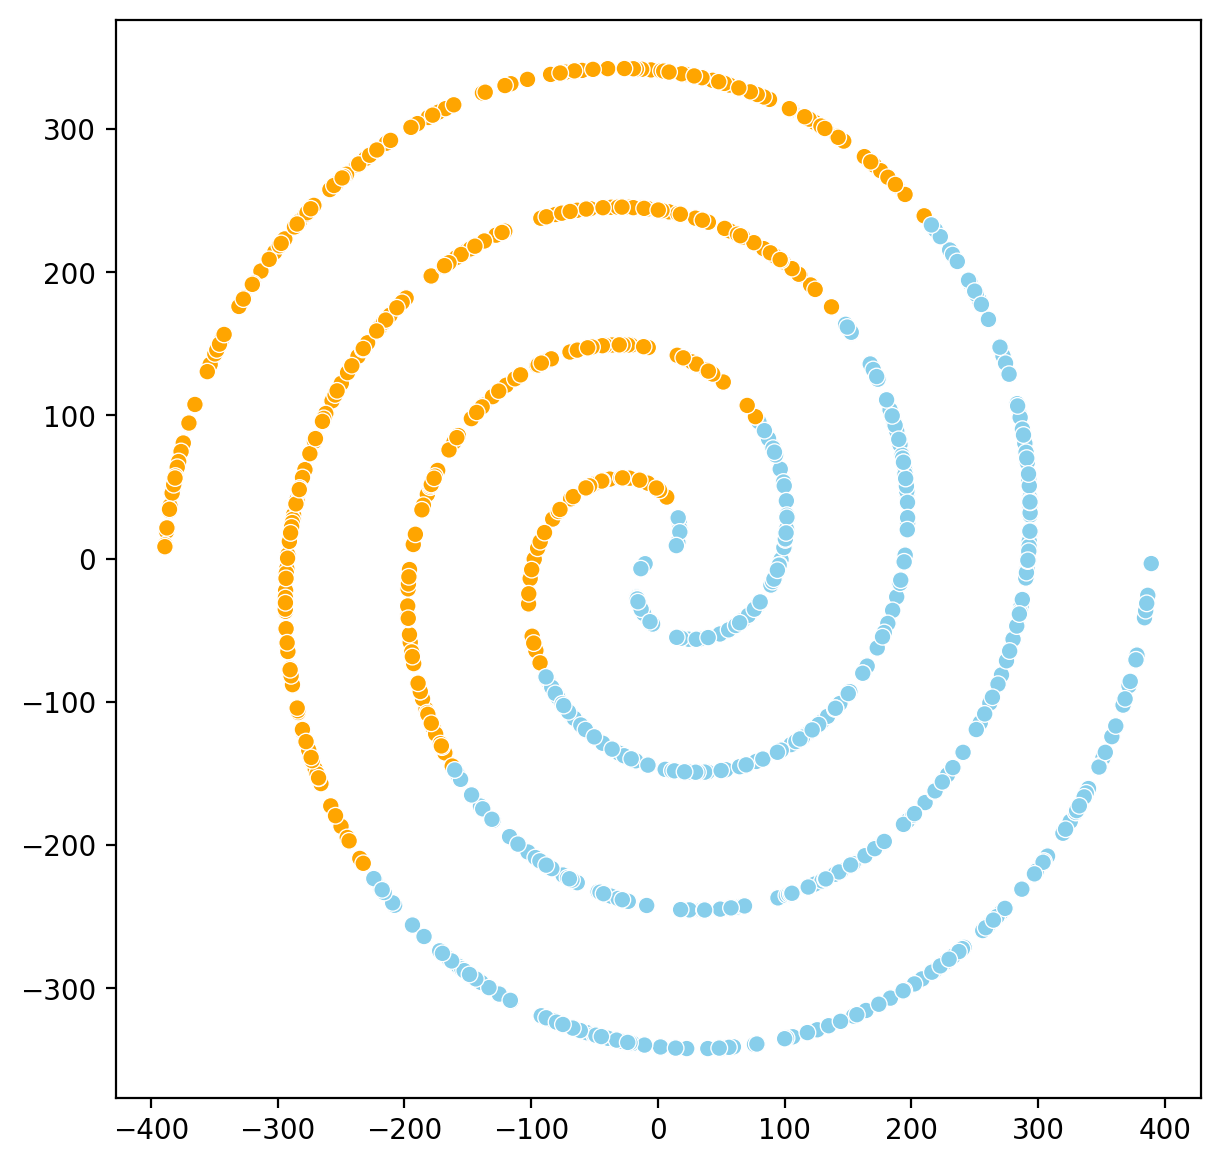

In [92]:
color_code={0:'Orange', 1:'Skyblue'}
km = KMeans(n_clusters=2, random_state=1, n_init=10)
km.fit(X_4)
y_km = km.labels_

plt.figure(figsize=(7,7))
sns.scatterplot(x=X_4[:,0], y=X_4[:,1], c=[color_code.get(i) for i in y_km])
plt.show()

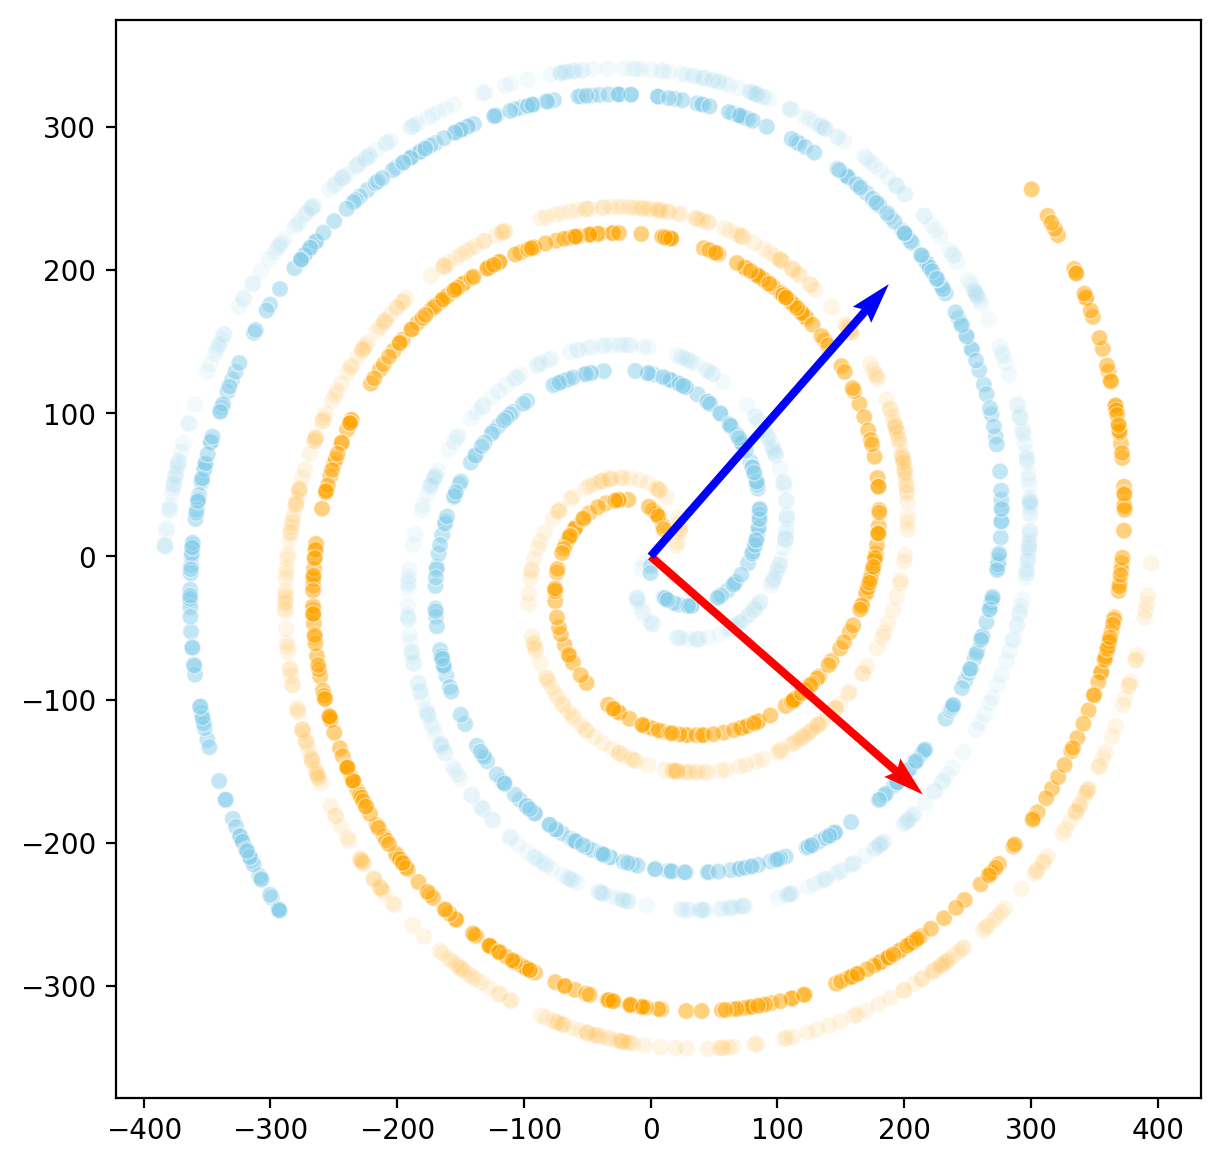

In [93]:
pca = PCA()
pca.fit(X_4)
eigens_v = pca.components_.T
PCscore = pca.transform(X_4)

color_code = {0:'orange', 1:'skyblue'}

mX = X_4.copy()
for i in range(mX.shape[1]):
    mX[:,i] = mX[:,i] - np.mean(mX[:,i])


plt.figure(figsize=(7,7))
sns.scatterplot(x=mX[:,0], y=mX[:,1], c=[color_code.get(i) for i in y_4], alpha=0.1)
sns.scatterplot(x=PCscore[:,0], y=PCscore[:,1], c=[color_code.get(i) for i in y_4], alpha=0.5)

origin = (0, 0)
plt.quiver(*origin, eigens_v[0,0], eigens_v[1,0], color='r', scale=3)
plt.quiver(*origin, eigens_v[0,1], eigens_v[1,1], color='b', scale=3)
plt.show()

In [94]:
pca.explained_variance_ratio_

array([0.55536525, 0.44463475])